#                  医疗费用个人数据集分析

数据来自kaggle: https://www.kaggle.com/mirichoi0218/insurance
***

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
pl.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
data = pd.read_csv('./insurance.csv')

# 字段名称

年龄：主要受益人的年龄

性别：保险承包商性别，女性，男性

bmi：是用体重公斤数除以身高米数平方得出的数字，是目前国际上常用的衡量人体胖瘦程度以及是否健康的一个标准。主要用于统计用途，当我们需要比较及分析一个人的体重对于不同高度的人所带来的健康影响时，BMI值是一个中立而可靠的指标，理想情况下为18.5至24.9

儿童：健康保险覆盖的儿童人数/家属人数

吸烟者：是否吸烟

地区：受益人在美国居住区域东北，东南，西南，西北。

医疗支出：由健康保险计费的个人医疗费用

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

在数据中没有“NaN”，太好了！


# 将sex、smoker、region类别属性转化为数值属性

In [5]:
sex_mapping = {
           'male': 0,
           'female': 1}
smoker_mapping = {
           'yes': 1,
           'no': 0}
region_mapping = {
           'northeast': 0,
           'southeast': 1,
           'southwest': 2,
           'northwest': 3}
data['sex'] = data['sex'].map(sex_mapping)
data['smoker'] = data['smoker'].map(smoker_mapping)
data['region'] = data['region'].map(region_mapping)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


# 接下来看看每个字段与医疗支出的皮尔逊相关系数。

In [6]:
# corr函数接口参看官方文档： https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html
data.corr(method ='pearson',min_periods = 1)['charges'].sort_values() 

sex        -0.057292
region     -0.050226
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

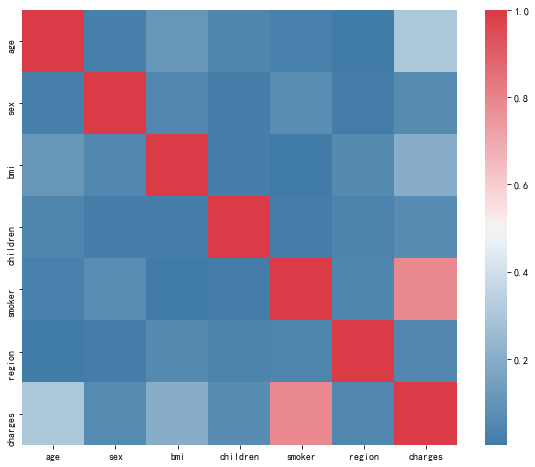

In [7]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr(method ='pearson',min_periods = 1).abs()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

# charges只与smoker有很强的的相关性，bmi和age次之
![![image.png](attachment:image.png)](https://img-s2.onedio.com/id-5aa155e69065f7cf10132bc5/rev-0/w-500/s-5c6ec7366c0b35f7b310eae5c1ee17526982e700.gif)

# 让我们来看看医疗支出(charges)的分布

In [8]:
# bokeh是python中一款基于网页的画图工具库，画出的图像以html格式保存。
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
p = figure(title=u"医疗支出分布",tools="save",
            background_fill_color="#E8DDCB")
hist, edges = np.histogram(data.charges) #转化为直方图
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p.xaxis.axis_label = 'x'
p.yaxis.axis_label = 'Pr(x)'
show(gridplot(p,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

Text(0.5,1,'非吸烟者的医疗支出分布')

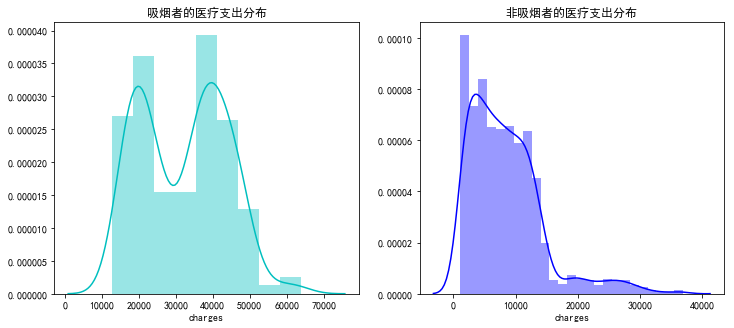

In [9]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]['charges'],color='c',ax=ax)
ax.set_title(u'吸烟者的医疗支出分布')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title(u'非吸烟者的医疗支出分布')

上图可以看出吸烟的人医疗支出更多。另外感觉不吸烟的人数量更多，来看看吧！

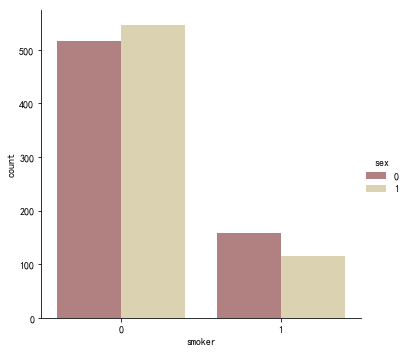

In [10]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

注意： sex字段男性为0，女性为1。

分析上图，不吸烟的人显然多于吸烟的人。我们还注意到男性吸烟的人数比女性吸烟的人多。考虑到吸烟因素，也许男性的治疗总成本比女性多，接下来会验证这个想法。让我们看看更有意思的可视化。

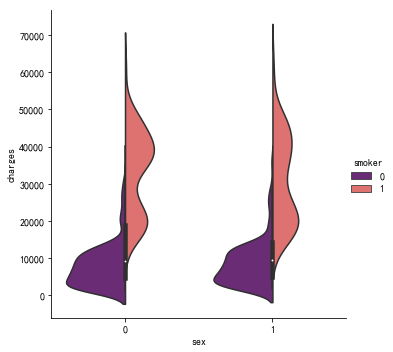

In [11]:
# 小提琴图（violin）事实上是密度图和箱型图的结合
# 分别表示箱型图的含义和任意位置的概练密度
# 下图为拆分的小提琴图
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", split=True, data=data, palette = 'magma')

注意： sex字段男性为0，女性为1。

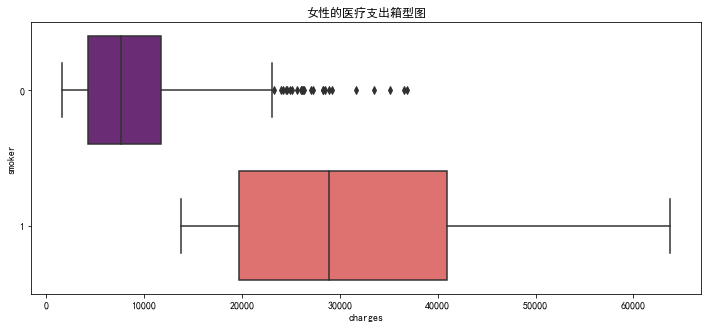

In [12]:
pl.figure(figsize=(12,5))
pl.title(u"女性的医疗支出箱型图")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')

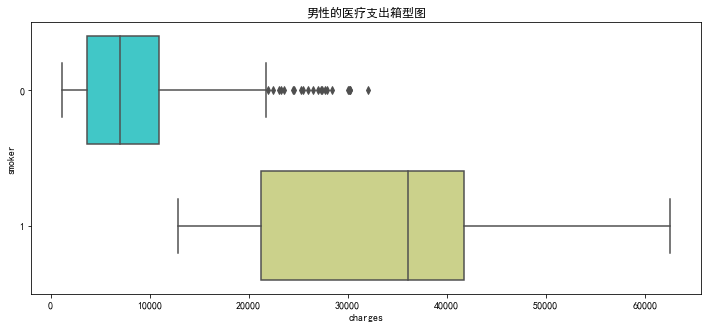

In [13]:
pl.figure(figsize=(12,5))
pl.title(u"男性的医疗支出箱型图")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

考虑到吸烟因素，确实男性的治疗成本比女性多点

# 现在我们把注意力放在年龄上

先看看数据集中所有人员的年龄分布，再看看年龄与医疗支出的关系

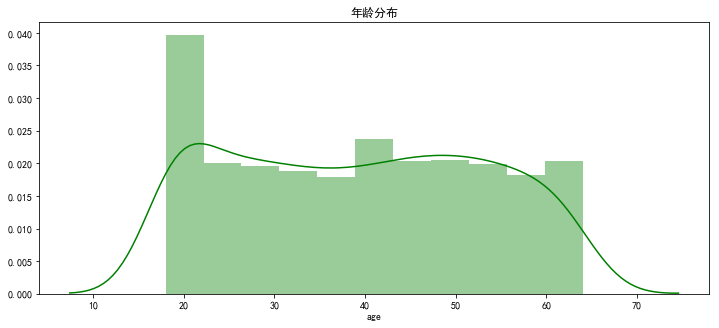

In [14]:
pl.figure(figsize=(12,5))
pl.title("年龄分布")
ax = sns.distplot(data["age"], color = 'g')

年龄在18岁到64岁之间分布，有点好奇18岁人群的情况，看看吸烟人数量在未来的趋势

Text(0.5,1,'18岁人群中吸烟人与非吸烟人的数量')

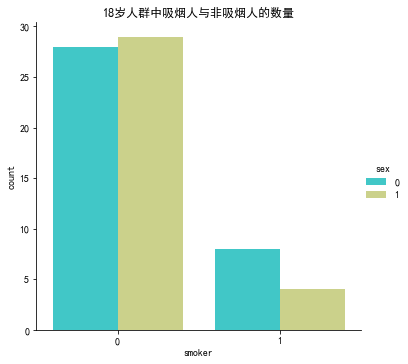

In [15]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("18岁人群中吸烟人与非吸烟人的数量")

注意： sex字段男性为0，女性为1。

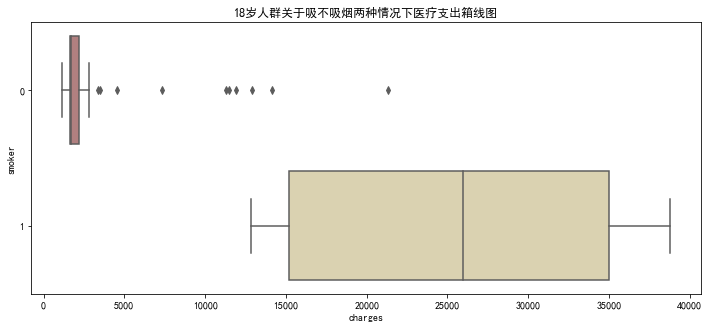

In [16]:
pl.figure(figsize=(12,5))
pl.title("18岁人群关于吸不吸烟两种情况下医疗支出箱线图")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

![![image.png](attachment:image.png)](https://media.giphy.com/media/bgGainulgkZhK/giphy.gif)
难以相信！即使在18岁,吸烟者在医疗上的花费也超过不吸烟者。在不吸烟者中,我们看到了一些“尾部的点点”，猜想可能是由于严重的疾病或事故。

现在让我们分别看看吸烟者与非吸烟者人群中年龄与医疗支出的关系。

Text(0.5,1,'非吸烟者的年龄、医疗支出分布情况')

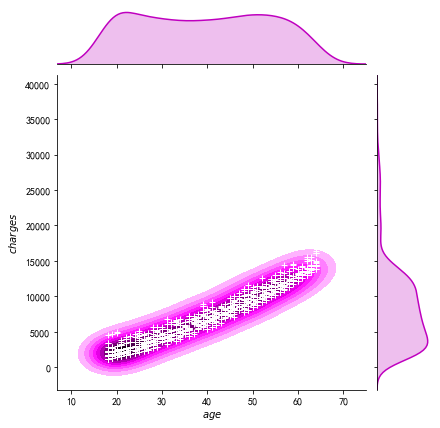

In [17]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde", color="m")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$age$", "$charges$")
ax.set_title('非吸烟者的年龄、医疗支出分布情况')

非吸烟者年龄分布挺均匀，医疗支出普遍较少

Text(0.5,1,'吸烟者的年龄、医疗支出分布情况')

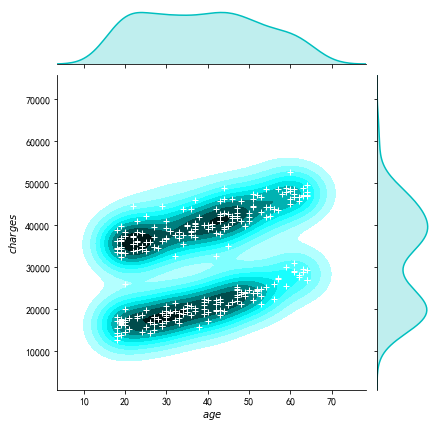

In [18]:
g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$age$", "$charges$")
ax.set_title('吸烟者的年龄、医疗支出分布情况')

吸烟者相比非吸烟者大约42岁以后年龄越大人越少，发生了什么？人都哪去了？值得思考

另外吸烟者医疗支出出现两个峰值，是因为贫富差距？还是因为对健康的重视程度分裂严重？这些猜想要爬取其他数据分析验证了

另外不管是吸烟者还是非吸烟者随着年龄增长，医疗支出都在增加，这在意料之中，与生活经验相符；

有个问题自然而然产生，对于拥有同等健康意识初值的人，吸烟者相比不吸烟者是否健康意识强烈度增长的更快？斜率是否更大？不得而知，以后爬取数据分析吧

***

接下来我们看看bmi与医疗支出的影响

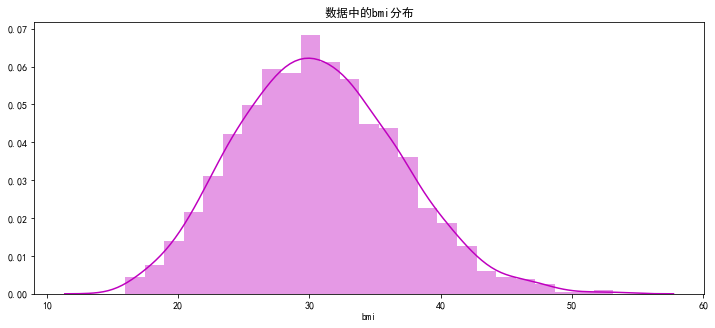

In [19]:
pl.figure(figsize=(12,5))
pl.title("数据中的bmi分布")
ax = sns.distplot(data["bmi"], color = 'm')

好标准的正态分布！平均bmi在30左右，健康专家对不同bmi指标看法如下：
![![image.png](attachment:image.png)](http://1j4g1pasf991x0osxuqz6d10.wpengine.netdna-cdn.com/wp-content/uploads/2017/03/BMI-CHART-1024x791.png)

可以看到超过30就开始肥胖了，让我们以30为分界点看看医疗支出分布

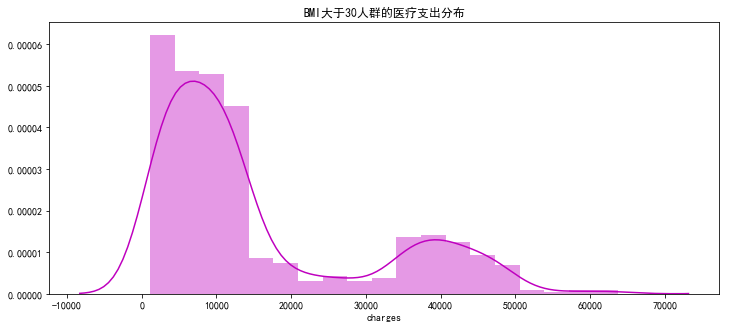

In [20]:
pl.figure(figsize=(12,5))
pl.title("BMI大于30人群的医疗支出分布")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

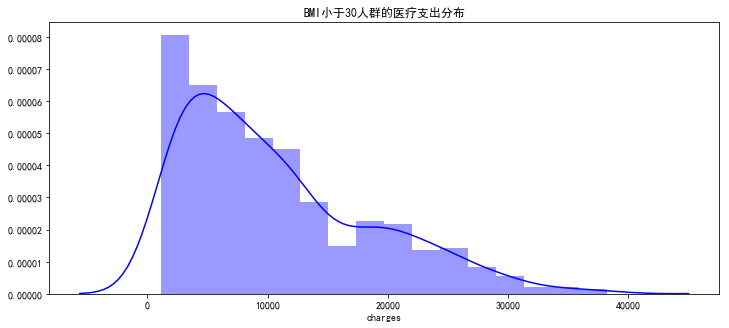

In [21]:
pl.figure(figsize=(12,5))
pl.title("BMI小于30人群的医疗支出分布")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'b')

BMI在30以上的人群高医疗支出的概率更大

Text(0.5,1,'bmi和charges的联合分布')

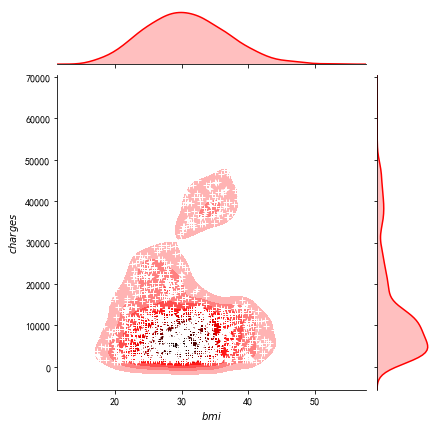

In [22]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$bmi$", "$charges$")
ax.set_title('bmi和charges的联合分布')

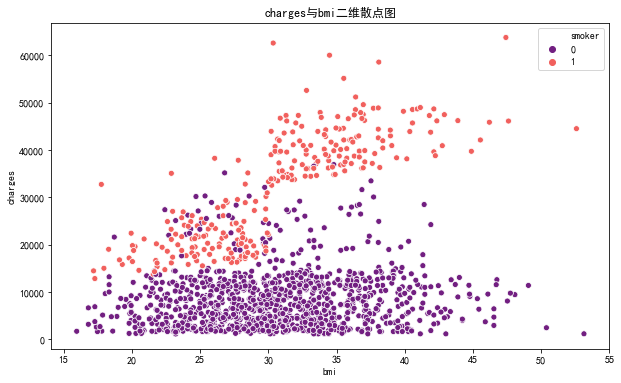

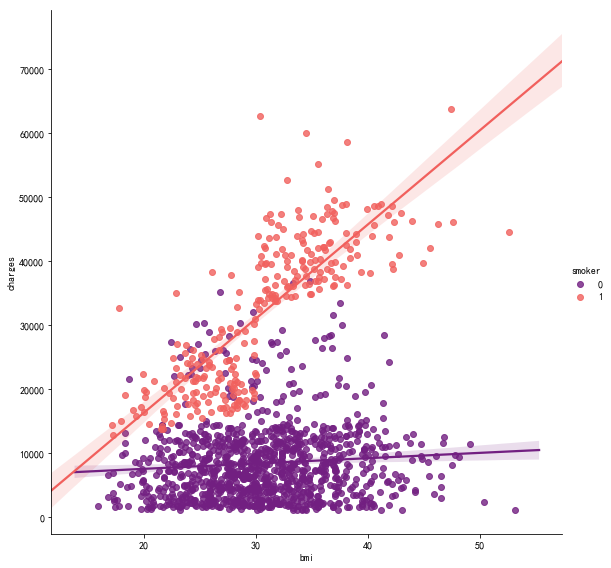

In [23]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('charges与bmi二维散点图')

# lmplot是用来绘制回归图的，通过lmplot我们可以直观地总览数据的内在关系
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma', size = 8)

结果一目了然，对于吸烟者，随着bmi值增加，医疗支出快速增加

按照相关性顺序，现在我们来关注children字段

老规矩，先看分布

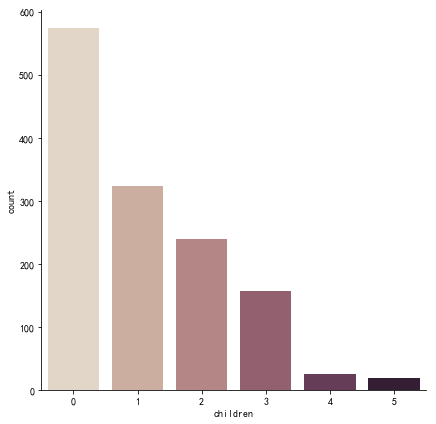

In [24]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

再看看children字段与smoker字段的关系

Text(0.5,1,'吸烟者 VS 非吸烟者 之 健康保险覆盖家人数量比对')

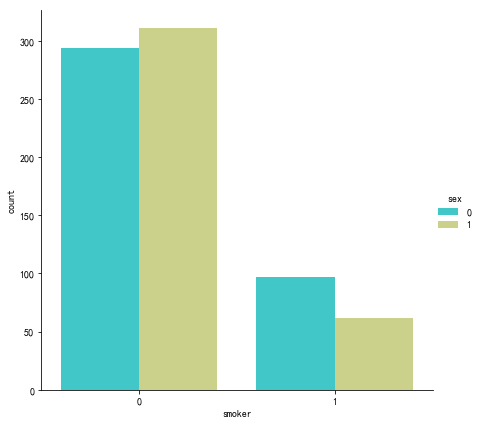

In [25]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('吸烟者 VS 非吸烟者 之 健康保险覆盖家人数量比对')

数据摸索的差不多了，是时候预测一波了，Let's go！come...

奥卡姆剃刀定律：如无必要，勿增实体

先从最简单模型开始，从简单到复杂：线性回归 -> 多项式回归 -> 随机森林回归

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

线性回归：

In [27]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)


#score函数解释
#作用：返回该次预测的系数R2 
#其中R2 =（1-u/v）
#    u=((y_true - y_pred) ** 2).sum()     
#    v=((y_true - y_true.mean()) ** 2).sum()
#总结：值越接近1拟合的越好
print(lr.score(x_test,y_test))

0.7953553122367144


这个模型太简单了，都没有特征工程，准确率有点低，不能就此止步，来看多项式回归算法

In [28]:
X = data.drop(['charges'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

#score函数解释
#作用：返回该次预测的系数R2 
#其中R2 =（1-u/v）
#    u=((y_true - y_pred) ** 2).sum()     
#    v=((y_true - y_true.mean()) ** 2).sum()
#总结：值越接近1拟合的越好
print(plr.score(X_test,Y_test))

0.8843708337966927


In [29]:
X = data.drop(['charges','region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

#score函数解释
#作用：返回该次预测的系数R2 
#其中R2 =（1-u/v）
#    u=((y_true - y_pred) ** 2).sum()     
#    v=((y_true - y_true.mean()) ** 2).sum()
#总结：值越接近1拟合的越好
print(plr.score(X_test,Y_test))

0.8849197344147235


首先多项式模型预测准确率确实高于线性模型，另外0.8849197344147235 > 0.8843708337966927,去掉region字段效果有所提升

准确率还不够，让我们用更复杂的模型：随机森林回归

In [30]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3681119.890, MSE test data: 19818897.229
R2 train data: 0.974, R2 test data: 0.874


0.974(随机森林回归训练集) > 0.8849197344147235（多项式测试集1） > 0.8843708337966927（多项式测试集2） > 0.874(随机森林回归测试集)

怀疑随机森林回归过拟合了

过拟合：机器学习算法要能可靠预测，提高泛化能力，必须保证测试集与训练集要同分布，但现实是训练集相比测试集总有特殊的部分，我们称为噪音，意思就是机器在学习的时候把噪音也学进去了。

来想办法验证我们的猜想

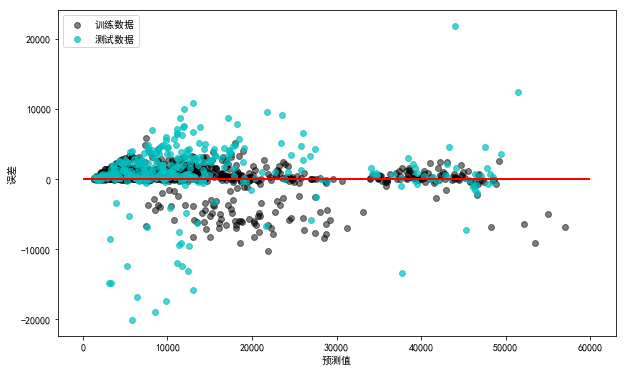

In [31]:
pl.figure(figsize=(10,6))

#画散点图
#X:训练集预测值
#Y:训练集预测值 - 训练集真实值
pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = u'训练数据')

#X:测试集预测值
#Y:测试集预测值 - 测试集真实值
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = u'测试数据')
pl.xlabel(u'预测值')
pl.ylabel(u'误差')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

可以看出，站在训练好的随机森林回归模型角度，训练数据与测试数据基本同分布，但左下角略有不同，有过拟合

那么对于随机森林如何解决过拟合？

1.相对于其他算法随机森林不容易产生过拟合问题，要从数据下手分析，看看左下角的这些噪声是怎么回事。
2.增大训练集数量
3.增大决策树数目
4.减少树的深度
5.增加验证集
6....

![![image.png](attachment:image.png)](https://pa1.narvii.com/6768/0df1e15da5ca7405050f9ff377f8b369f884aebf_00.gif)

完结，谢谢观看！